## Single hidden-layer ANN - it's a highlight, no such work has been done
$X_i^l$ is the $i^{th}$ input from $l^{th}$ layer with $i \in [1,n]$ ; specially, $X_{i \, \,k_l \times 1}^l$ is observations (i.e. input layer). the input from $l^{th}$ layer have $k_l$ elements ,that is, $(X_i^l)_j$ is the $j^{th}$ element with $j \in [1,k_l] $. For the convience of later deduction, we define:
$$X_{i \, (k_1+1) \times 1}^l\prime = 
\begin{bmatrix}
  1 \\
  X_i^l
  \end{bmatrix}$$

$W^l_{\,\,\,k_2\times k_1+1}$ is the weight matrix between $l^{th}$ layer and $(l+1)^{th}$ layer. $W_{p \cdot}$ is the $p^{th}$ row of $W$, likewise, $W_{\cdot q}$ is the $q^{th}$ column of $W$. For example, we have $W^1_{1 \cdot} X_i^1\prime = (X_i^2)_1$. We define 
$$ X_{ \,k_{l+1} \times (k_l+1) }^l\prime = 
\begin{bmatrix}
  (X_1^l)^T & (X_2^l)^T & \cdot \cdot \cdot & (X_n^l)^T
  \end{bmatrix}$$

$Y_i$ is the observed label of $X_i^1$,$(Y_i)_j$ is the $j^th$ element of $Y_i$. In the case of single hidden-layer ANN, without consideration of activation, $\hat{Y_i}$ is estimted by $X_i^2$, that is $\hat{Y} = \hat{W^1}X_{i \,k_2 \times (k_1+1) }^1\prime$

To find $\hat{W^1}$ that minimises MSE $\sum_i^{k_2}(Y_i-\hat{Y_i})^2$ equals to solve the normal equation  $(X^1)^T\prime\hat{Y_i} = (X^1\prime)^T(X^1\prime)(W^1)$. This is obtained by matrix munipulation from $(X^1)^T\prime\hat{(Y_i)_j} = (X^1\prime)^T(X^1\prime)(W^1)_{j \cdot}$

Proof of equivalency between the minimisation of MSE and the solution to the normal equation:
Suppose we would like to estimate $\mathbf w$ that minimise $ \| \mathbf y - X \mathbf w \|^2$
 $$\hat{\mathbf w} = \operatorname{arg \, min}\limits_{\mathbf w} J(\mathbf w) =  \operatorname{arg \, min}\limits_{\mathbf w} \| \mathbf y - X \mathbf w \|^2$$
  $$J(\mathbf w) = \| \mathbf y - X \mathbf w \|^2 = ( \mathbf y - X \mathbf w )^T ( \mathbf y - X \mathbf w ) = \mathbf y^T \mathbf y - (X \mathbf w)^T \mathbf y - \mathbf y^T (X \mathbf w) + (X \mathbf w)^T (X \mathbf w) = \mathbf y^T \mathbf y - 2 \mathbf w^T X^T \mathbf y + \mathbf w^T X^T X \mathbf w$$
  $$\frac{\partial J(\mathbf w)}{\partial \mathbf w} = - 2 X^T \mathbf y + 2 X^T X \mathbf w \mathop{=}\limits^! \mathbf 0$$
  It turns into $$X^T X \mathbf w = X^T \mathbf y$$
  Below is the intuitive interpretation of this transformation. if $\mathbf y \not \in C(X)$ where $C(X)$ is the column space of $X$, then $X \mathbf w = \mathbf y$ has no solution.$X^T$ project $w$ onto $C(X)$, thus there is always a solution for normal equation. However, $X^T X$ is not always invertible. Go back to single layer problem, $\operatorname{dim}(\hat{W})$ quantifies the number of local minimum. Additionally, $\operatorname{dim}(\hat{W}) =\operatorname{dim}(\operatorname{Nul} ((X_i^1\prime)^TX_i^1\prime)) = k1+1 - \operatorname{dim}(\operatorname{C} (X_i^1\prime)(X_i^1\prime)^T)  \leq k_1+1 $
  
We now investigate the impact of the increment of $n$ on $\operatorname{dim}(\operatorname{Nul} (X_i^1\prime))$. Without loss of generalisation, $n$ is supposed to be larger than $k_1+1$.

Theory: the dimension Nul space of a matrix product $A_{m \times n}(A_{m \times n})^T$, $m \le n$ converges towards $m$ when $n$ towards infinite.
Proof:  $$\operatorname{dim}(\operatorname{Nul} (A_{m \times n}(A_{m \times n})^T)) = m - \operatorname{dim}(\operatorname{C} (A_{m \times n}(A_{m \times n})^T))$$
$$\lim_{n \rightarrow \infty} rank(A_{m \times n}(A_{m \times n})^T)\rightarrow m $$, since $ \lim_{n \rightarrow \infty} rowRank(A_{m \times n}) \rightarrow m$

Thus,
$$\lim_{n \rightarrow \infty} \operatorname{dim}(\operatorname{Nul} (A_{m \times n}(A_{m \times n})^T)) \rightarrow  0 $$

Conclusion: Increasing sample size can reduce "the dimension of local minimum subspace"

<div class="alert alert-block alert-info">
<b>Missing:</b> impact of activation function and hidden layer is explained in following blocks
</div>



## Theory Validation 
- data generation: 2D linear separable data, with dim(output)=1
    - Generate a random n-class classification problem. **make_classfication** of sklearn initially creates clusters of points normally distributed (std=1) about vertices of an n_informative-dimensional hypercube with sides of length 2*class_sep and assigns an equal number of clusters to each class. It can also introduce interdependence between these features and adds various types of further noise to the data.(will be tested thereafter)
- single layer perceptron building
    - pytorch layer stacking
- Experimental validation
    - the result is compared by changing *n_samples*. 
    - graphical interpretation: *loss_landscapes.random_plane* reference and documents are needed

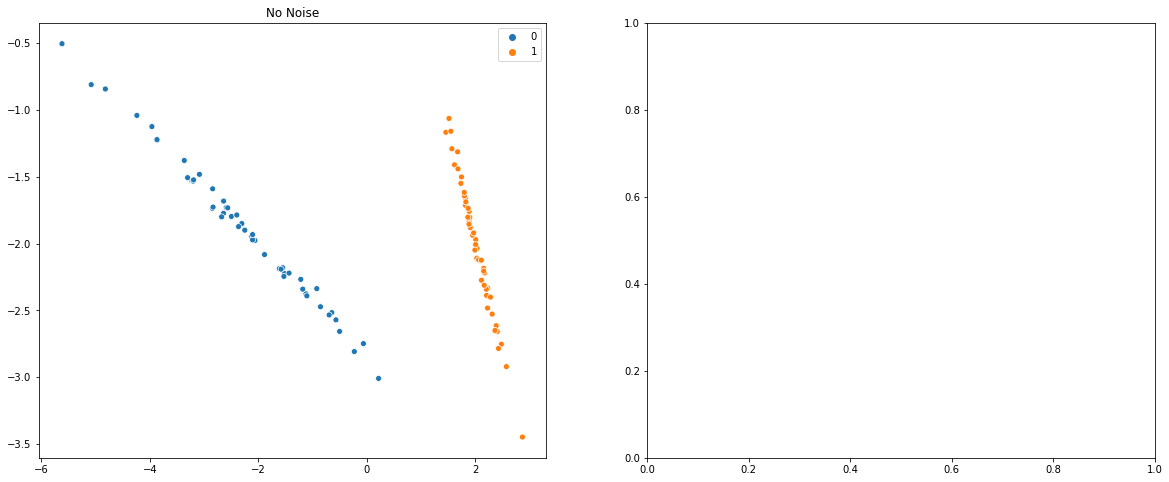

In [13]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
# Generate Clean data
X,y = make_classification(n_samples=100, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("No Noise");
# # Generate noisy Data - for later test
# X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0.2,weights=[0.5,0.5], random_state=17)
# sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax2);
# ax2.set_title("With Noise");
# plt.show();

In [14]:
import torch.nn
import copy
import torch.optim as optim
from tqdm import tqdm
'''arthor: gansheng TAN, aegean0045@outlook.com
last update : 07,Dec,2019
'''
class singleL_ANN(torch.nn.Module):
    """ single hidden layer that is as well output layer """
    def __init__(self, x_dim, y_dim):
        super().__init__()
        self.linear_1 = torch.nn.Linear(x_dim, y_dim)

    def forward(self, x):
        h = self.linear_1(x)
        return h

def train(model, optimizer, criterion, train_loader,y, epochs):
    """ Trains the given model with the given optimizer, loss function, etc. """
    #self loop
    model.train()
    # train model
    for _ in tqdm(range(epochs), 'Training'):
        for i in range(len(y)):
            optimizer.zero_grad()
            pred = model(X[i])
            loss = criterion(pred, y[i])
            loss.backward()
            optimizer.step()

    model.eval()

x_dim = 2
y_dim = 1
SANN = singleL_ANN(x_dim ,y_dim)


# use SGD for each iteration with initial lr and momentum
optimizer = optim.SGD(SANN.parameters(),lr=0.01, momentum=0.9)
# MSE-normal equation
criterion = torch.nn.MSELoss()
SANN_initial = copy.deepcopy(SANN)

#convert types
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()
train_loader = torch.utils.data.DataLoader(X, batch_size=1, shuffle=False)

train(SANN, optimizer, criterion, X,y, 20)

SANN_final = copy.deepcopy(SANN)

Training: 100%|████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.12it/s]


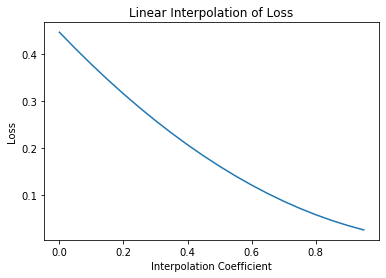

In [15]:
import loss_landscapes
import loss_landscapes.metrics
X_1 = iter(train_loader).__next__()
y_1 = iter(y).__next__()
metric = loss_landscapes.metrics.Loss(criterion, X_1, y_1)

# compute loss data
steps=20
loss_data = loss_landscapes.linear_interpolation(SANN_initial, SANN_final, metric, steps, deepcopy_model=True)

plt.plot([1/steps * i for i in range(steps)], loss_data)
plt.title('Linear Interpolation of Loss')
plt.xlabel('Interpolation Coefficient')
plt.ylabel('Loss')
axes = plt.gca()
# axes.set_ylim([2.300,2.325])
plt.show()

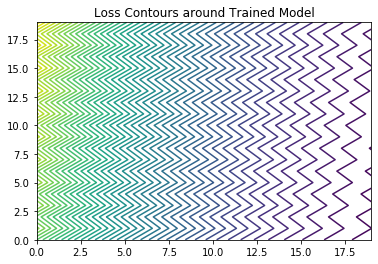

In [16]:
loss_data_fin = loss_landscapes.random_plane(SANN_final, metric, 10, steps, normalization='filter', deepcopy_model=True)
plt.contour(loss_data_fin, levels=50)
plt.title('Loss Contours around Trained Model')
plt.show()

f:\software\2python\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using Qt5Agg, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


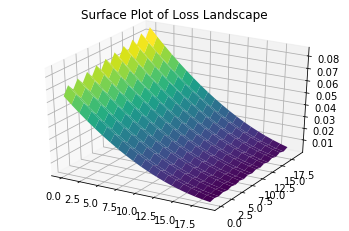

In [17]:
from mpl_toolkits import mplot3d
import numpy as np

fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.array([[j for j in range(steps)] for i in range(steps)])
Y = np.array([[i for _ in range(steps)] for i in range(steps)])
ax.plot_surface(X, Y, loss_data_fin, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Surface Plot of Loss Landscape')
fig.show()


# Multiple layer ANNs (with more than 1 hidden layer)
- Mathematical base:
    - homogeneous non-linear equations - that can be analyzed qualitatively
- deduction

Let us do not consider activation function in the first time. Following the rationale in single layer perceptron, we have, for $i^th$ observation, 
$$ X_{i \, (k_{l+1}) \times 1}^{l+1} = \hat{W^l}X_{i \, (k_l+1) \times 1 }^l\prime $$
Coercing the identification of $X_{i \, (k_l+1) \times 1 }^l\prime$ and $X_{i \, (k_l+1) \times 1 }^l$ will not have impact on subsequent analysis, which leads to
$$ X_{i \, (k_{l+1}) \times 1}^{l+1} = \prod_{j=l}^{1}\hat{W^j}X_{i \, (k_1+1) \times 1 }^1\prime $$

Taking $l=2$ as an example, we have
$$ X_{i \, (k_3) \times 1}^{3} = \prod_{j=2}^{1}\hat{W^j}X_{i \, (k_1+1) \times 1 }^1 $$
$$ (X_{i \, (k_3) \times 1}^{3})_p = \prod_{j=2}^{1}(\hat{W^j})_{p\cdot}X_{i \, (k_1+1) \times 1 }^1 $$
with $$ X_{ \,k_{l+1} \times (k_l+1) }^l = 
\begin{bmatrix}
  (X_1^l)^T & (X_2^l)^T & \cdot \cdot \cdot & (X_n^l)^T
  \end{bmatrix}$$
$$(X_{ \, (k_3) \times 1}^{3})_{\dot p} = (\hat{W^2}\hat{W^1})_{p\cdot}X_{ \, (k_1+1) \times 1 }^1 $$
$$(W^2W^1)_{ij} =\sum_{k=1}^{k_2}(W^2)_{ik}(W^1)_{kj}, i \in [1,k_3], j \in [1, k_1] $$
$$\operatorname{dim}(\operatorname{SolutionSpace}(\hat{W^2}\hat{W^1})_{p\cdot})) =   \operatorname{dim}(\operatorname{Nul} (X_{ \, (k_1+1) \times 1 }^1)^TX_{ \, (k_1+1) \times 1 }^1)$$
Suppose $\{\mathbf{w_1},\mathbf{w_2},\cdot \cdot \cdot \mathbf{w_r}\}$ is the basis of solution space. For $\mathbf w = \sum_{i=1}^r \mathbf{w_i}x_i$, with $x_i$s as coordinations.
the current objective is to determine $\hat{W^2}$ and $\hat{W^1}$ that satisties $(\hat{W^2}\hat{W^1})_{p\cdot}) = \mathbf w$. For any  $\hat{W^2}$ fixed, the dimension of solution space of  $\hat{W^1}$ depends on the rank of  $\hat{W^2}$. The higher the rank is, the smaller the dimension of solution space is. Specially, when $\hat{W^2}$ is invertible, the dimension of solution space of $\hat{W^1}$ is the dimension of $\mathbf w$ 

Further, since $\hat{W^2} = \sum_(i=1)^{k_3}\sum^{k_2}_{j=1}E_{ij}x_ij$, where $E_{ij} is the unit matrix$, i.e.$(E_{ij})_{pq} = 1$ iff $p=j$ and $q=j$. 

In the condition that each $\hat{W^l}$ is invertible, the dimension of local minimal$ = (k_l\times k_{l-1})(k_{l-1}\times k_{l-2}) \cdot \cdot \cdot  (k_3\times k_2) \times \operatorname {dim} (\mathbf w)$, which increases when the network becomes deeper.

At last, the activation is essentially a non-linear transformation, which means that it is an isomorphisme of a matrix. According to the fact that matrix multiplication will only lower the rank. In sum, the conclusion remains.

<div class="alert alert-block alert-info">
<b>I recommend to add :</b>spin-glass model
</div>


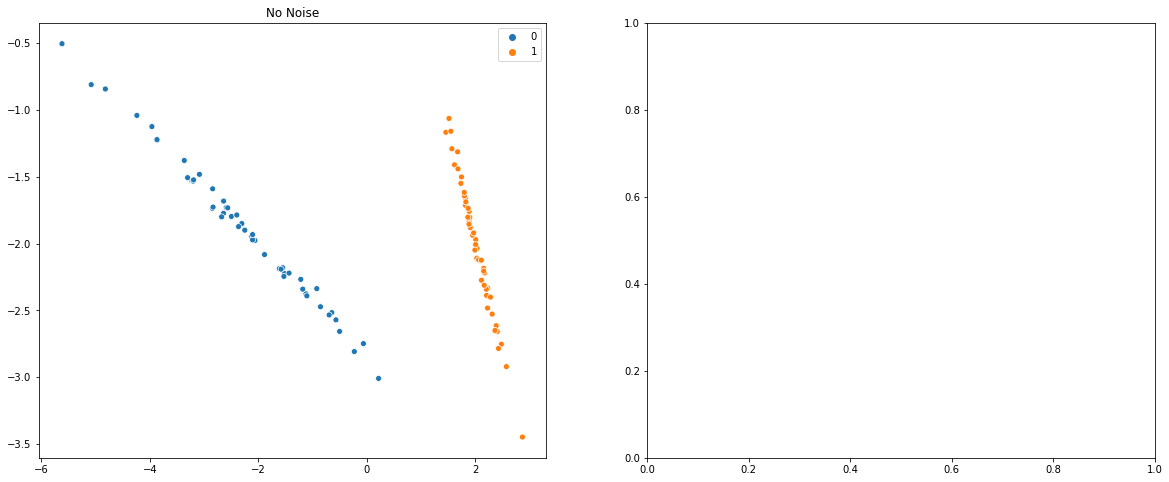

In [43]:
# Validation of theory deduction
# Network construction using pyTorch - Modification based on 
# https://medium.com/dair-ai/a-simple-neural-network-from-scratch-with-pytorch-and-google-colab-c7f3830618e0

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import copy
# Generate Clean data
X,y = make_classification(n_samples=100, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("No Noise");
'''
arthor: gansheng TAN, aegean0045@outlook.com
last update : 07,Dec,2019
acknowlegement:Elvis
'''
class Neural_Network_1hidden(nn.Module):

    def __init__(self, ):
        super(Neural_Network_1hidden, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 4
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize) # 2 X 4 tensor
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) # 4 X 1 tensor
        
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) # Matrix product of two tensors.
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function to return output
        return o.T
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    def backward(self, X, y, o):
        self.o_error = y - o # error in output
        self.o_delta = (self.o_error * self.sigmoidPrime(o)).T # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
        
    def train(self, X, y):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o)
        
    def saveWeights(self, model):
        # we will use the PyTorch internal storage functions
        torch.save(model, "NN")
        # you can reload model with all the weights and so forth with:
        # torch.load("NN")
        
    def predict(self):
        print ("Predicted data based on trained weights: ")
        print ("Input (scaled): \n" + str(xPredicted))
        print ("Output: \n" + str(self.forward(xPredicted)))
        
NN_1hidden = Neural_Network_1hidden()
NN_1hidden_init = copy.deepcopy(NN_1hidden)
X=torch.from_numpy(X).float()
y=torch.from_numpy(y).float()
y=y.T

In [44]:
for i in range(30):  # propagate times
    print ("#" + str(i) + " Loss: " + str(torch.mean((y - NN_1hidden(X))**2).detach().item()))  # mean sum squared loss
    NN_1hidden.train(X, y)
NN_1hidden.saveWeights(NN_1hidden)
NN_1hidden_final = copy.deepcopy(NN_1hidden)

#0 Loss: 0.18870829045772552
#1 Loss: 0.07643487304449081
#2 Loss: 0.06937149912118912
#3 Loss: 0.0038454136811196804
#4 Loss: 0.0002713458670768887
#5 Loss: 0.00024848736939020455
#6 Loss: 0.00023040738597046584
#7 Loss: 0.00021553899568971246
#8 Loss: 0.0002029735187534243
#9 Loss: 0.00019213736231904477
#10 Loss: 0.00018264801474288106
#11 Loss: 0.00017423562530893832
#12 Loss: 0.00016670390323270112
#13 Loss: 0.00015990494284778833
#14 Loss: 0.00015372510824818164
#15 Loss: 0.0001480741921113804
#16 Loss: 0.00014288046804722399
#17 Loss: 0.0001380848843837157
#18 Loss: 0.00013363930338528007
#19 Loss: 0.00012950313976034522
#20 Loss: 0.00012564264761749655
#21 Loss: 0.0001220288104377687
#22 Loss: 0.00011863680265378207
#23 Loss: 0.00011544508015504107
#24 Loss: 0.00011243530752835795
#25 Loss: 0.00010959108476527035
#26 Loss: 0.00010689827468013391
#27 Loss: 0.00010434384603286162
#28 Loss: 0.0001019170813378878
#29 Loss: 9.96079106698744e-05


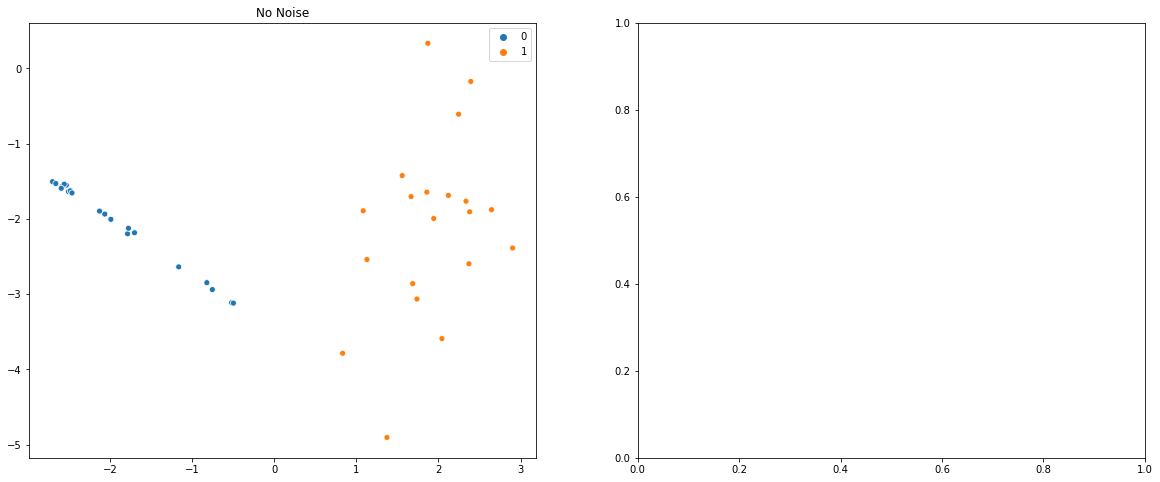

In [97]:
import torch.nn
import copy
import torch.optim as optim
from tqdm import tqdm
import torch.nn.functional as F
'''arthor: gansheng TAN, aegean0045@outlook.com
last update : 07,Dec,2019
'''
class ANN_1hidden(torch.nn.Module):
    """ with one hidden layer """
    def __init__(self, x_dim, y_dim):
        super().__init__()
        self.linear_1 = torch.nn.Linear(x_dim, 10)
        self.linear_2 = torch.nn.Linear(10, y_dim)

    def forward(self, x):
        h = F.relu(self.linear_1(x))
        return self.linear_2(h)

def train(model, optimizer, criterion, train_loader,y, epochs):
    """ Trains the given model with the given optimizer, loss function, etc. """
    #self loop
    model.train()
    # train model
    for _ in tqdm(range(epochs), 'Training'):
        for i in range(len(y)):
            optimizer.zero_grad()
            pred = model(X[i])
            loss = criterion(pred, y[i])
            loss.backward()
            optimizer.step()

    model.eval()

x_dim = 2
y_dim = 1
ANN1 = ANN_1hidden(x_dim ,y_dim)


X,y = make_classification(n_samples=40, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("No Noise");

# use SGD for each iteration with initial lr and momentum
optimizer = optim.SGD(ANN1.parameters(),lr=0.01, momentum=0.9)
# MSE-normal equation
criterion = torch.nn.MSELoss()
ANN1_initial = copy.deepcopy(ANN1)

#convert types
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()


In [98]:
train_loader = torch.utils.data.DataLoader(X, batch_size=1, shuffle=False)
train(ANN1, optimizer, criterion, X,y, 20)
ANN1_final = copy.deepcopy(ANN1)


Training: 100%|████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 10.98it/s]


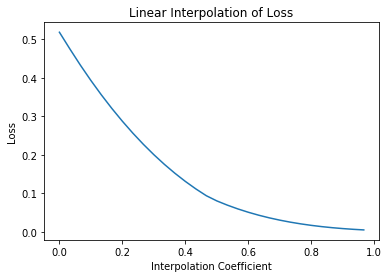

In [99]:
import loss_landscapes
import loss_landscapes.metrics
X_1 = iter(train_loader).__next__()
y_1 = iter(y).__next__()
metric = loss_landscapes.metrics.Loss(criterion, X_1, y_1)

# compute loss data
steps=30
loss_data = loss_landscapes.linear_interpolation(ANN1_initial, ANN1_final, metric, steps, deepcopy_model=True)

plt.plot([1/steps * i for i in range(steps)], loss_data)
plt.title('Linear Interpolation of Loss')
plt.xlabel('Interpolation Coefficient')
plt.ylabel('Loss')
axes = plt.gca()
# axes.set_ylim([2.300,2.325])
plt.show()

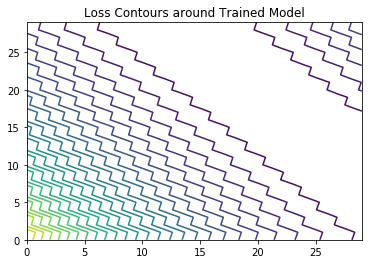

In [100]:
loss_data_fin = loss_landscapes.random_plane(ANN1_final, metric, 10, steps, normalization='filter', deepcopy_model=True)
plt.contour(loss_data_fin, levels=30)
plt.title('Loss Contours around Trained Model')
plt.show()

f:\software\2python\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


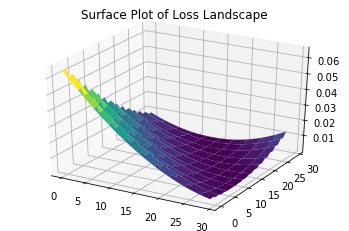

In [103]:
from mpl_toolkits import mplot3d
import numpy as np

fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.array([[j for j in range(steps)] for i in range(steps)])
Y = np.array([[i for _ in range(steps)] for i in range(steps)])
ax.plot_surface(X, Y, loss_data_fin, rstride=3, cstride=3, cmap='viridis', edgecolor='none')
ax.set_title('Surface Plot of Loss Landscape')
fig.show()


Training: 100%|████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.89it/s]


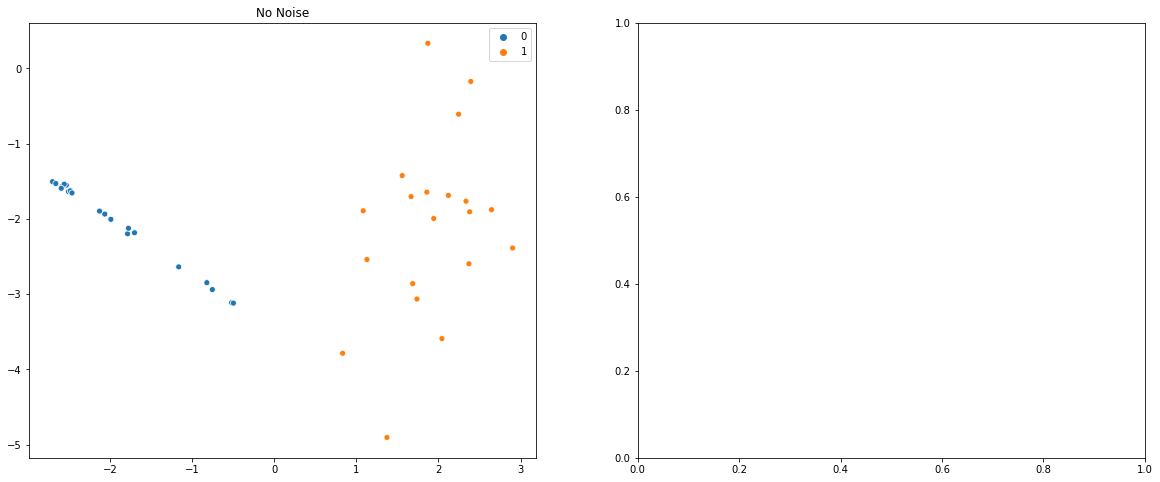

In [109]:
# 2 hidden layer
import torch.nn
import copy
import torch.optim as optim
from tqdm import tqdm
import torch.nn.functional as F
'''arthor: gansheng TAN, aegean0045@outlook.com
last update : 07,Dec,2019
'''
class ANN_2hidden(torch.nn.Module):
    """ with one hidden layer """
    def __init__(self, x_dim, y_dim):
        super().__init__()
        self.linear_1 = torch.nn.Linear(x_dim, 5)
        self.linear_2 = torch.nn.Linear(5, 5)
        self.linear_3 = torch.nn.Linear(5, y_dim)

    def forward(self, x):
        h = F.relu(self.linear_1(x))
        h1 = F.relu(self.linear_2(h))
        return self.linear_3(h)

def train(model, optimizer, criterion, train_loader,y, epochs):
    """ Trains the given model with the given optimizer, loss function, etc. """
    #self loop
    model.train()
    # train model
    for _ in tqdm(range(epochs), 'Training'):
        for i in range(len(y)):
            optimizer.zero_grad()
            pred = model(X[i])
            loss = criterion(pred, y[i])
            loss.backward()
            optimizer.step()

    model.eval()

x_dim = 2
y_dim = 1
ANN2 = ANN_2hidden(x_dim ,y_dim)


X,y = make_classification(n_samples=40, n_features=2, n_informative=2,n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,flip_y=0,weights=[0.5,0.5], random_state=17)
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("No Noise");

# use SGD for each iteration with initial lr and momentum
optimizer = optim.SGD(ANN2.parameters(),lr=0.01, momentum=0.9)
# MSE-normal equation
criterion = torch.nn.MSELoss()
ANN2_initial = copy.deepcopy(ANN2)

#convert types
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()
train_loader = torch.utils.data.DataLoader(X, batch_size=1, shuffle=False)
train(ANN2, optimizer, criterion, X,y, 20)
ANN2_final = copy.deepcopy(ANN2)


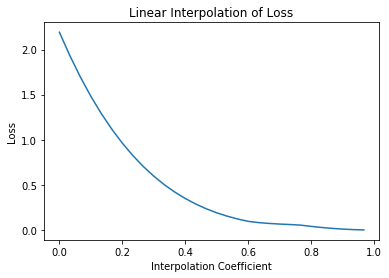

In [110]:
import loss_landscapes
import loss_landscapes.metrics
X_1 = iter(train_loader).__next__()
y_1 = iter(y).__next__()
metric = loss_landscapes.metrics.Loss(criterion, X_1, y_1)

# compute loss data
steps=30
loss_data = loss_landscapes.linear_interpolation(ANN2_initial, ANN2_final, metric, steps, deepcopy_model=True)

plt.plot([1/steps * i for i in range(steps)], loss_data)
plt.title('Linear Interpolation of Loss')
plt.xlabel('Interpolation Coefficient')
plt.ylabel('Loss')
axes = plt.gca()
# axes.set_ylim([2.300,2.325])
plt.show()

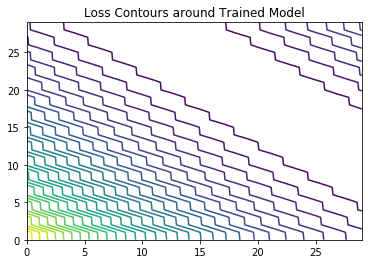

In [112]:
loss_data_fin = loss_landscapes.random_plane(ANN2_final, metric, 10, steps, normalization='filter', deepcopy_model=True)
plt.contour(loss_data_fin, levels=30)
plt.title('Loss Contours around Trained Model')
plt.show()

f:\software\2python\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


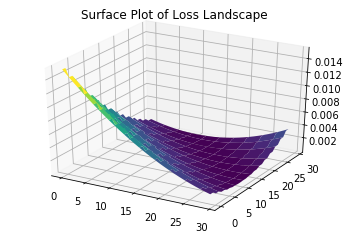

In [113]:
from mpl_toolkits import mplot3d
import numpy as np

fig = plt.figure()
ax = plt.axes(projection='3d')
X = np.array([[j for j in range(steps)] for i in range(steps)])
Y = np.array([[i for _ in range(steps)] for i in range(steps)])
ax.plot_surface(X, Y, loss_data_fin, rstride=3, cstride=3, cmap='viridis', edgecolor='none')
ax.set_title('Surface Plot of Loss Landscape')
fig.show()


# Conclusion
- ANNs often(almost) have non-convex loss function (surface)

# Discussion
- Overfitting discussion the impact of depth and sample size on overfitting (indicator: $\frac{traing\, acc}{test\, acc}$)
- Non-convex theory - local minimum approximate global minimum (reference:The Loss Surfaces of Multilayer Networks)[https://arxiv.org/abs/1412.0233]
- Real-life dataset simulation